# Evaluating Similarities Between Generic Drug Reactions # 
Goal is to identify the adverse reactions for a given generic drug. From these adverse reactions, a "reaction fingerprint" can be constructed for a generic drug that can be used to compared it to other generics.

In [1]:
from processOpenFDA import processOpenFDA


### Process subset of data ###
The entire openFDA database spans about twenty years of adverse reaction reporting. 

In [2]:
openFDA = processOpenFDA('')
openFDA.loadData()

### Understand and test the data ###
Make a few simple plots split by country to make sure data-loading works properly. Also interesting to know the national composition of the openFDA data. Countries also have different adverse affect profiles which are likely due to local reporting trends but also different geographic health risks

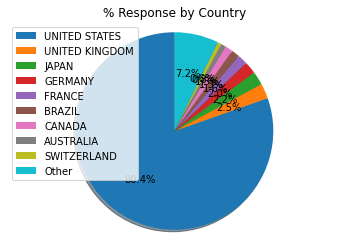

Index(['UNITED STATES', 'UNITED KINGDOM', 'JAPAN', 'GERMANY', 'FRANCE',
       'BRAZIL', 'CANADA', 'AUSTRALIA', 'SWITZERLAND', 'ITALY', 'NETHERLANDS',
       'DENMARK', 'SPAIN', 'ARGENTINA', 'VENEZUELA', 'KOREA, REPUBLIC OF',
       'ISRAEL', 'CHINA', 'SOUTH AFRICA', 'INDIA', 'BELGIUM', 'TURKEY',
       'MEXICO', 'TAIWAN, PROVINCE OF CHINA', 'COLOMBIA', 'POLAND', 'SWEDEN',
       'GREECE', 'PUERTO RICO', 'PORTUGAL', 'IRELAND', 'FINLAND', 'ECUADOR',
       'RUSSIAN FEDERATION', 'NORWAY', 'CZECH REPUBLIC', 'SINGAPORE',
       'TUNISIA', 'CROATIA (local name: Hrvatska)', 'NEW ZEALAND', 'HUNGARY',
       'ROMANIA', 'CHILE', 'THAILAND', 'COSTA RICA', 'UKRAINE', 'PHILIPPINES',
       'GUATEMALA', 'MALAYSIA', 'SAUDI ARABIA', 'HONG KONG', 'SERBIA',
       'LEBANON', 'IRAN (ISLAMIC REPUBLIC OF)', 'MALI', 'AUSTRIA', 'EGYPT',
       'SLOVAKIA (Slovak Republic)', 'ANGOLA', 'PANAMA', 'CYPRUS',
       'SYRIAN ARAB REPUBLIC', 'SLOVENIA', 'PERU', 'ICELAND',
       'KOREA, DEMOCRATIC PEOPLE'S REPUBLIC 

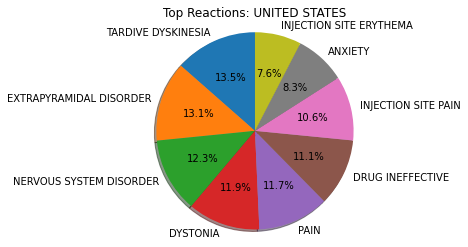

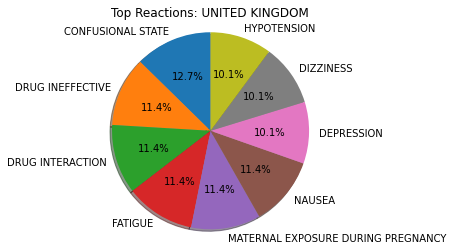

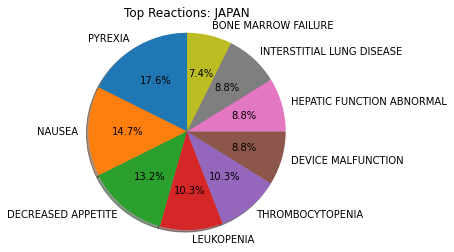

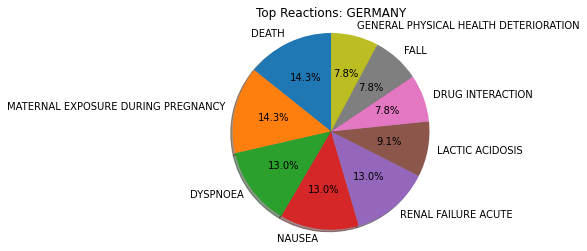

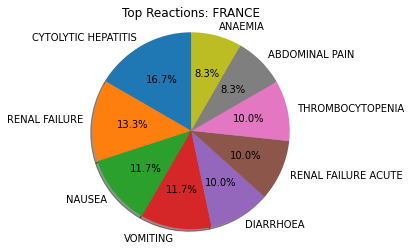

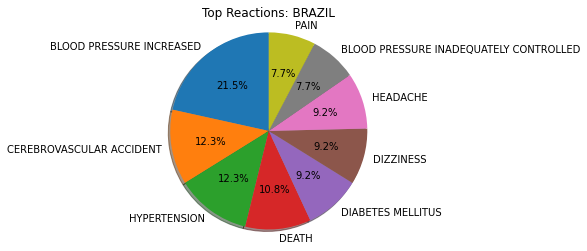

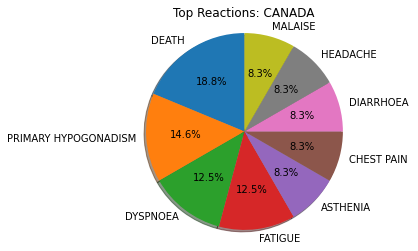

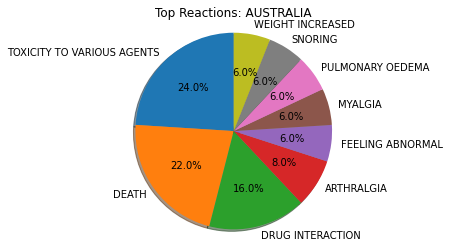

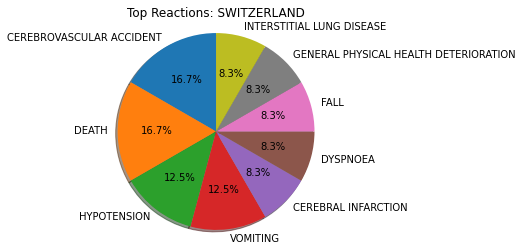

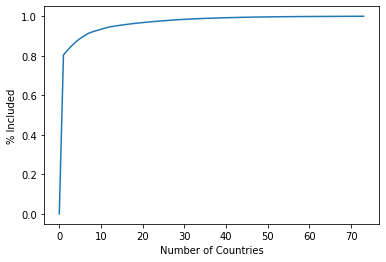

UNITED STATES-UNITED KINGDOM Dot Product: 0.393
UNITED STATES-AUSTRALIA Dot Product: 0.285
UNITED STATES-ITALY Dot Product: 0.132
UNITED STATES-SWITZERLAND Dot Product: 0.179
AUSTRALIA-UNITED KINGDOM Dot Product: 0.410
JAPAN-AUSTRALIA Dot Product: 0.269
ITALY-SWITZERLAND Dot Product: 0.203


In [3]:
openFDA.makeCountryPlots()

### Look at Drug Indications ###
We can look at the reactions for a given drug indication (disease) to understand what reactions are associated with its treatment. This gives us something like a "fingerprint" of associated reactions we could compare between drug indications.

{'RHEUMATOID ARTHRITIS'}: 13.01%
{'PRODUCT USED FOR UNKNOWN INDICATION'}: 8.86%
{'DYSPEPSIA', 'ABDOMINAL DISTENSION'}: 5.82%
{'PSORIASIS'}: 3.12%
{'CONTRACEPTION'}: 3.06%
{'PSORIATIC ARTHROPATHY'}: 2.51%
{'TYPE 2 DIABETES MELLITUS'}: 1.54%
{'CHRONIC OBSTRUCTIVE PULMONARY DISEASE'}: 1.45%
{'ATTENTION DEFICIT/HYPERACTIVITY DISORDER'}: 1.41%
{'PRODUCT USED FOR UNKNOWN INDICATION', 'RHEUMATOID ARTHRITIS'}: 1.30%
{'HYPERTENSION'}: 1.28%
{"CROHN'S DISEASE", 'PRODUCT USED FOR UNKNOWN INDICATION'}: 1.01%
{'OSTEOPOROSIS POSTMENOPAUSAL'}: 1.01%
{'DIABETES MELLITUS'}: 1.00%
Other: 54.61%


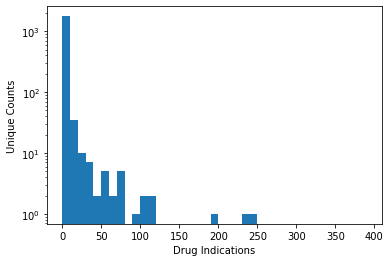

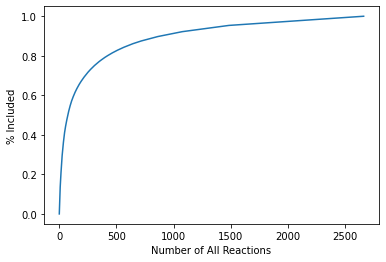

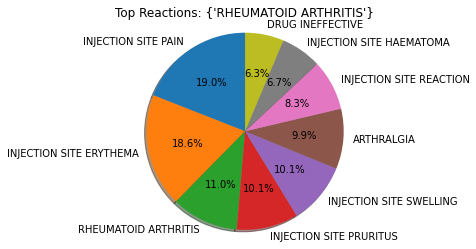

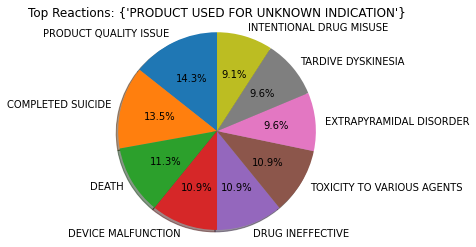

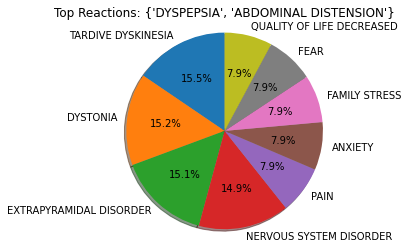

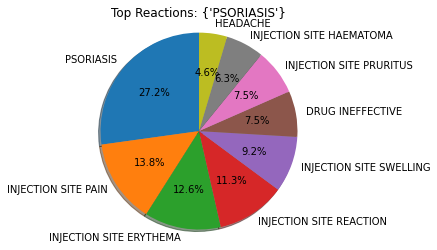

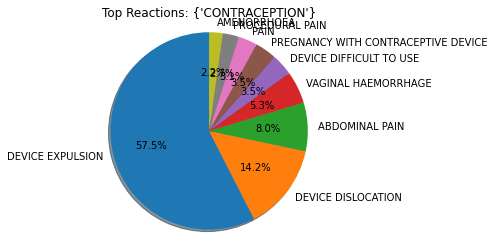

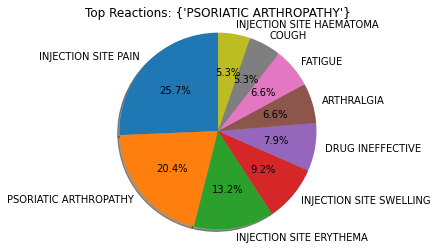

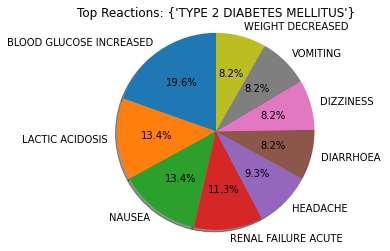

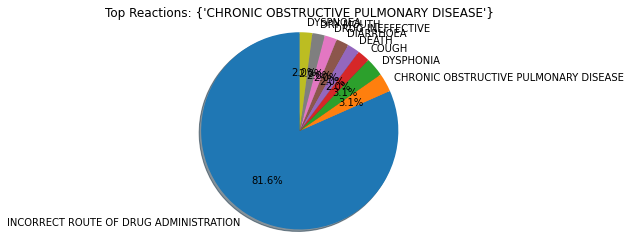

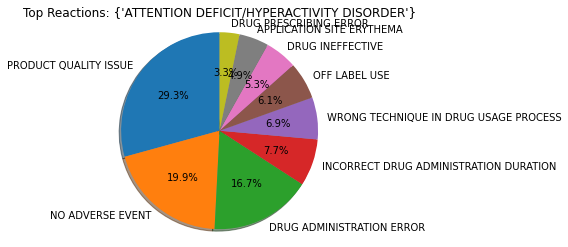

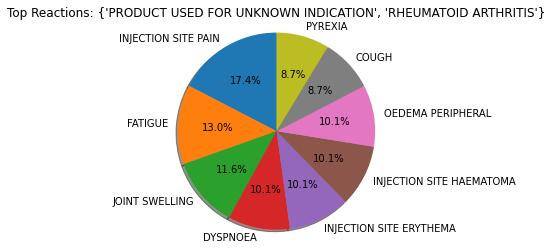

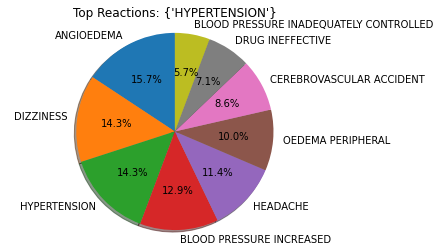

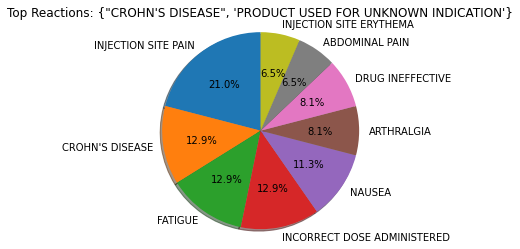

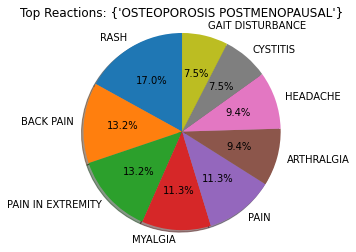

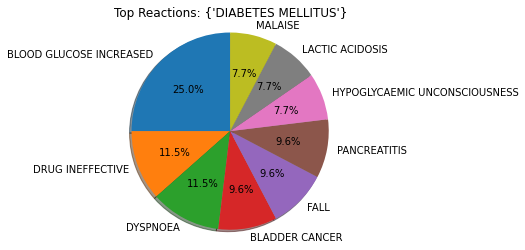

In [4]:
openFDA.drugIndicationStudies('reactions')

### Look at Drug Indications by Generic Name###
We can make the same sort of fingerprint for a particular disease by the generic name of a drug. This shows us the generics prescribed for a given disease

{'RHEUMATOID ARTHRITIS'}: 13.01%
{'PRODUCT USED FOR UNKNOWN INDICATION'}: 8.86%
{'DYSPEPSIA', 'ABDOMINAL DISTENSION'}: 5.82%
{'PSORIASIS'}: 3.12%
{'CONTRACEPTION'}: 3.06%
{'PSORIATIC ARTHROPATHY'}: 2.51%
{'TYPE 2 DIABETES MELLITUS'}: 1.54%
{'CHRONIC OBSTRUCTIVE PULMONARY DISEASE'}: 1.45%
{'ATTENTION DEFICIT/HYPERACTIVITY DISORDER'}: 1.41%
{'PRODUCT USED FOR UNKNOWN INDICATION', 'RHEUMATOID ARTHRITIS'}: 1.30%
{'HYPERTENSION'}: 1.28%
{"CROHN'S DISEASE", 'PRODUCT USED FOR UNKNOWN INDICATION'}: 1.01%
{'OSTEOPOROSIS POSTMENOPAUSAL'}: 1.01%
{'DIABETES MELLITUS'}: 1.00%
Other: 54.61%


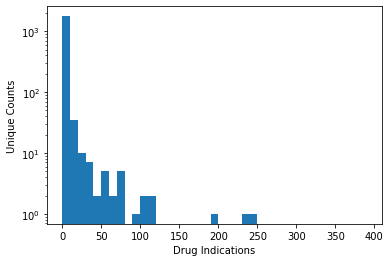

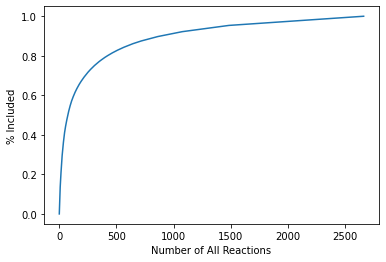

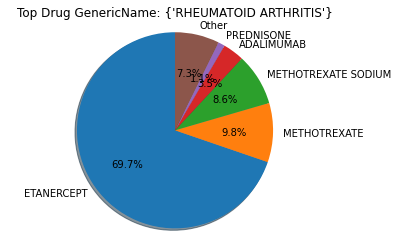

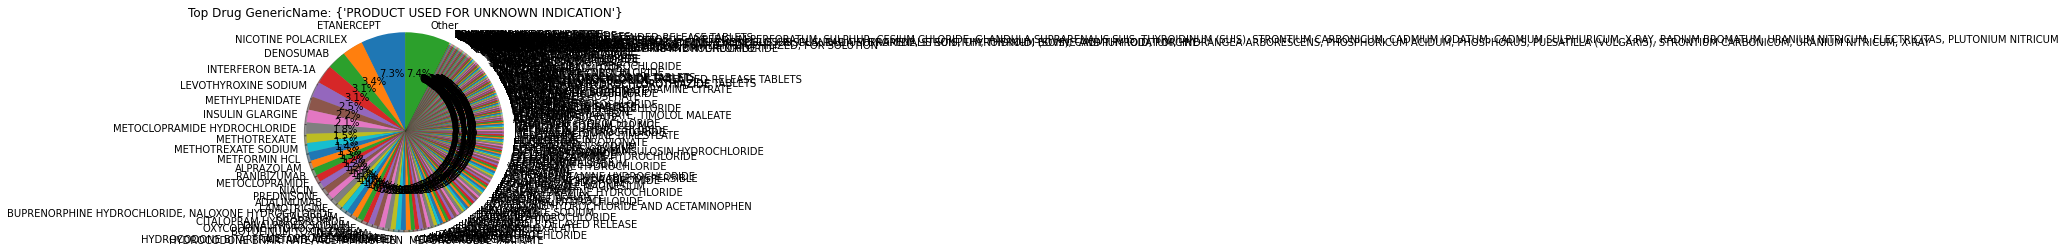

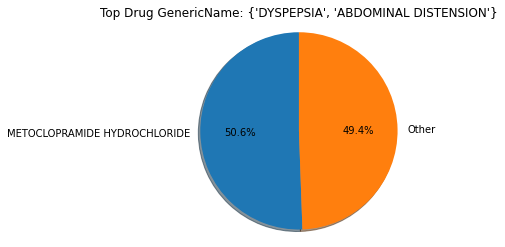

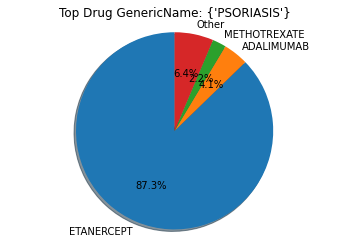

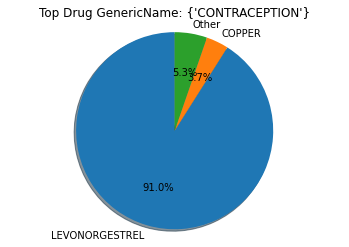

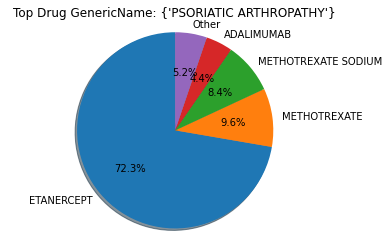

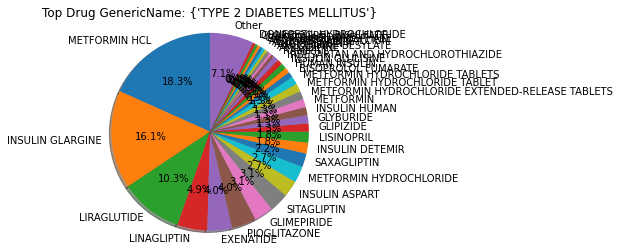

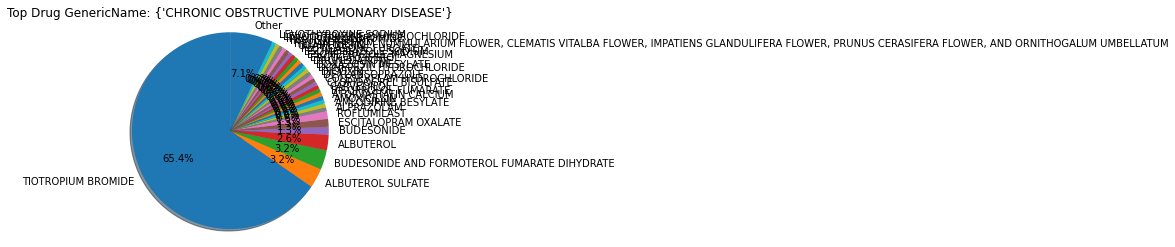

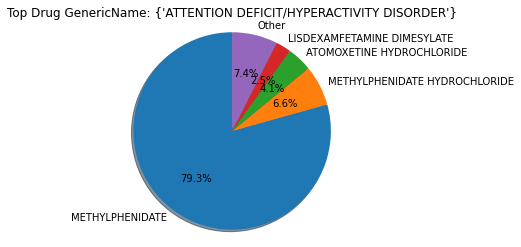

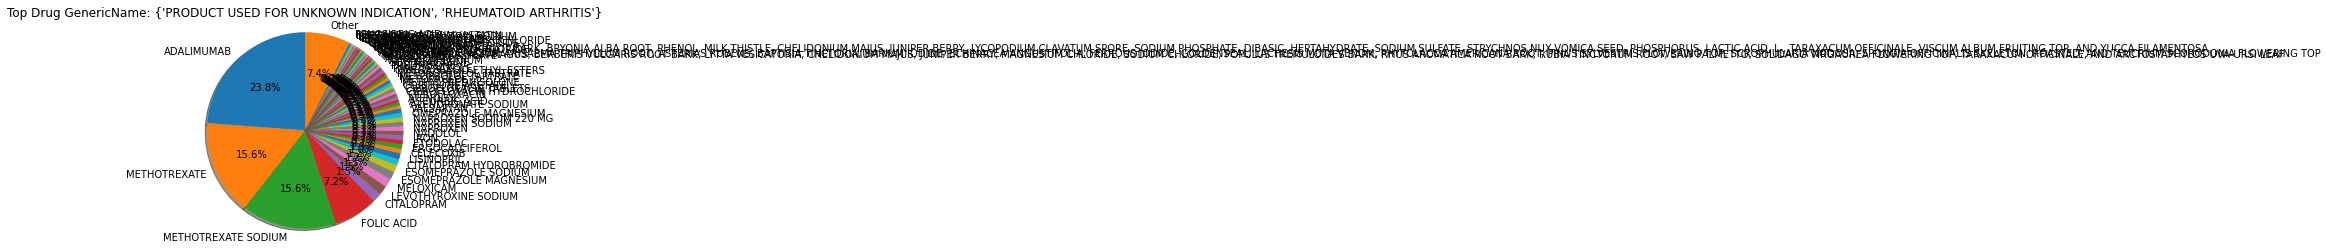

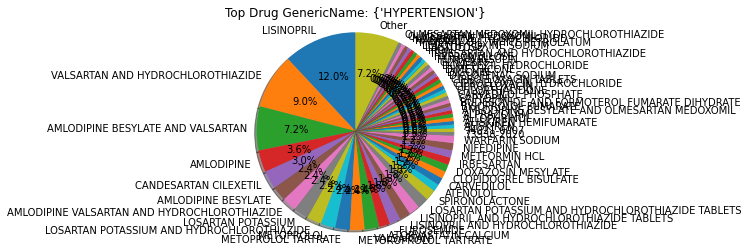

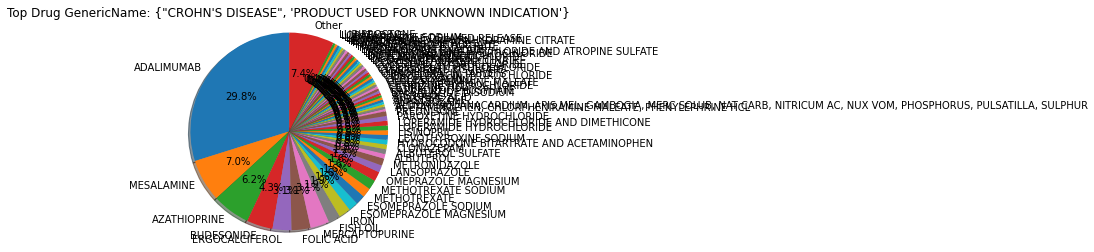

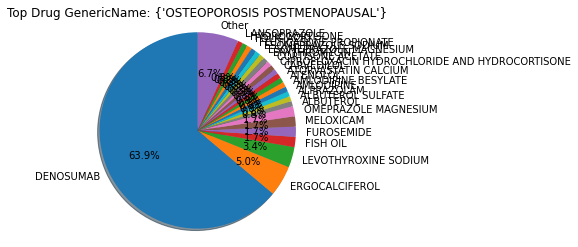

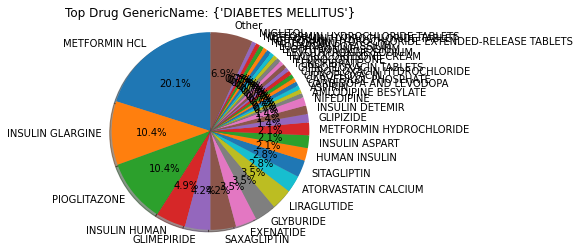

In [5]:
openFDA.drugIndicationStudies('genericNames')

### Encode reaction fingerprints ###
Are the fingerprints for a generic drug useful? If we encode reactions for different generics by frequency, we can compare how similar the adverse reactions are between two drugs

Number generic names/combos: 2668


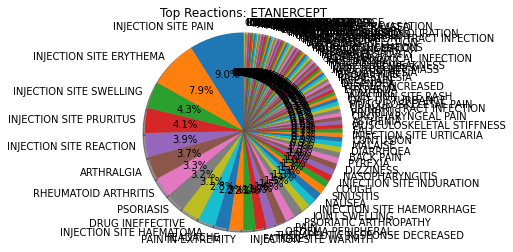

Number of unique reactions to ETANERCEPT: 4475
0.9999999999999999 7.857009940440491
[0.         0.00175576 0.         ... 0.         0.         0.        ]
Number generic names/combos: 2668


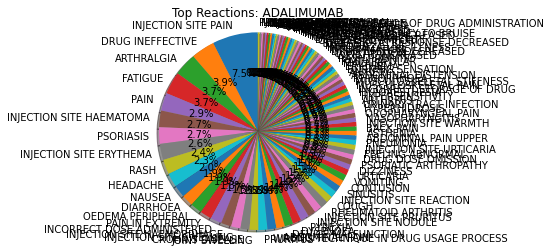

Number of unique reactions to ADALIMUMAB: 2022
1.0000000000000004 10.124437617747763
[0. 0. 0. ... 0. 0. 0.]
Number generic names/combos: 2668


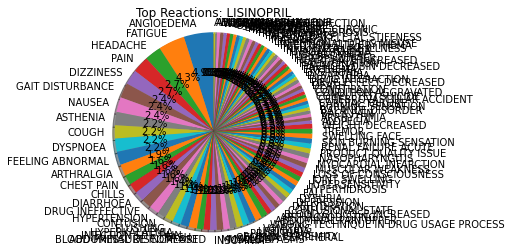

Number of unique reactions to LISINOPRIL: 581
1.0 11.90184009865483
[0.         0.         0.         ... 0.02048509 0.         0.        ]
Number generic names/combos: 2668


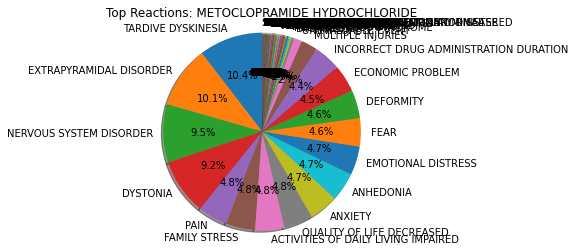

Number of unique reactions to METOCLOPRAMIDE HYDROCHLORIDE: 5054
1.0 3.9664294010093712
[0. 0. 0. ... 0. 0. 0.]
Number generic names/combos: 2668


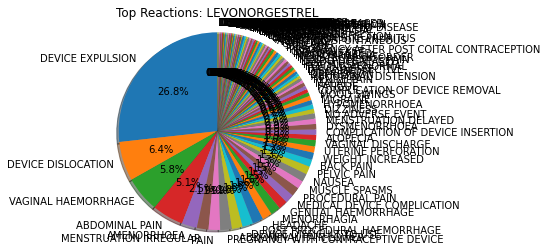

Number of unique reactions to LEVONORGESTREL: 752
0.9999999999999998 3.7069080542601838
[0.        0.0049294 0.        ... 0.        0.        0.       ]
Number generic names/combos: 2668


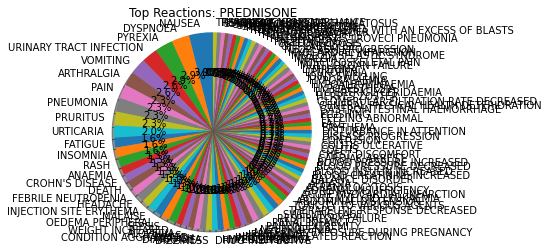

Number of unique reactions to PREDNISONE: 563
0.9999999999999997 14.222433002497525
[0.         0.         0.         ... 0.07578561 0.         0.        ]
Number generic names/combos: 2668


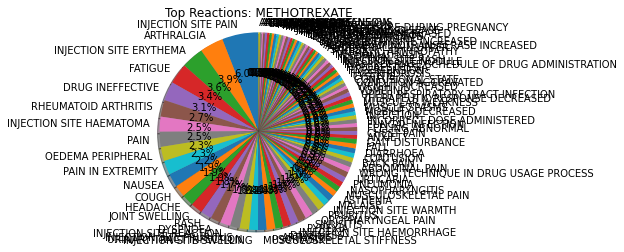

Number of unique reactions to METHOTREXATE: 1241
1.0000000000000002 11.486310148426087
[0. 0. 0. ... 0. 0. 0.]


In [6]:
#test.genericNameStudies() # produce fingerprints for all generics

encoded_ETA = openFDA.returnGenericEncoded('ETANERCEPT')
encoded_ADA = openFDA.returnGenericEncoded('ADALIMUMAB')
encoded_LIS = openFDA.returnGenericEncoded('LISINOPRIL')
encoded_METO = openFDA.returnGenericEncoded('METOCLOPRAMIDE HYDROCHLORIDE')
encoded_LEVO = openFDA.returnGenericEncoded('LEVONORGESTREL')
encoded_PRED = openFDA.returnGenericEncoded('PREDNISONE')
encoded_METHO = openFDA.returnGenericEncoded('METHOTREXATE')

In [7]:
encoded_ETA.dot(encoded_LEVO)

0.038314905461000984

In [8]:
encoded_ETA.dot(encoded_PRED)

0.34653538632609265

In [9]:
encoded_ETA.dot(encoded_LIS)

0.37531393982299033

In [10]:
encoded_ETA.dot(encoded_ADA)

0.8238520508993442

### Explore large overlap between Etanercept and Adalimumab ###
It turns out that Etanercept and Adalimumab have a large overlap compared to some other common drugs in the database. Why might that be? 

In [11]:
_df = openFDA.df_all.dropna(subset=['drugGenericName', 'drugIndication'])
_df[ (_df.drugGenericName.str.join('-').str.find('ETANERCEPT') != -1)].drugIndication.value_counts().keys()[:10]


Index([                                      {'RHEUMATOID ARTHRITIS'},
                                                        {'PSORIASIS'},
                                            {'PSORIATIC ARTHROPATHY'},
                              {'PRODUCT USED FOR UNKNOWN INDICATION'},
                                           {'ANKYLOSING SPONDYLITIS'},
                               {'PSORIATIC ARTHROPATHY', 'PSORIASIS'},
                                               {'JUVENILE ARTHRITIS'},
                    {'PSORIATIC ARTHROPATHY', 'RHEUMATOID ARTHRITIS'},
                                {'PSORIASIS', 'RHEUMATOID ARTHRITIS'},
       {'PSORIASIS', 'PSORIATIC ARTHROPATHY', 'RHEUMATOID ARTHRITIS'}],
      dtype='object')

In [12]:
_df[ (_df.drugGenericName.str.join('-').str.find('ADALIMUMAB') != -1)].drugIndication.value_counts().keys()[:10]


Index([ {'PRODUCT USED FOR UNKNOWN INDICATION', 'RHEUMATOID ARTHRITIS'},
             {'CROHN'S DISEASE', 'PRODUCT USED FOR UNKNOWN INDICATION'},
                                               {'RHEUMATOID ARTHRITIS'},
                   {'PRODUCT USED FOR UNKNOWN INDICATION', 'PSORIASIS'},
       {'PRODUCT USED FOR UNKNOWN INDICATION', 'PSORIATIC ARTHROPATHY'},
                                                    {'CROHN'S DISEASE'},
                                {'PRODUCT USED FOR UNKNOWN INDICATION'},
                                                          {'PSORIASIS'},
                                              {'PSORIATIC ARTHROPATHY'},
          {'COLITIS ULCERATIVE', 'PRODUCT USED FOR UNKNOWN INDICATION'}],
      dtype='object')

### What other drugs are commonly used to treat Rheumatoid Arthritis? ###

In [13]:
_df[ (_df.drugIndication.str.join('-').str.find('RHEUMATOID ARTHRITIS') != -1)].drugGenericName.value_counts().keys()[:20]


Index([                                                     {'ETANERCEPT'},
                     {'METHOTREXATE', 'METHOTREXATE SODIUM', 'ADALIMUMAB'},
                     {'METHOTREXATE', 'METHOTREXATE SODIUM', 'ETANERCEPT'},
                                   {'METHOTREXATE', 'METHOTREXATE SODIUM'},
                                            {'METHOTREXATE', 'ETANERCEPT'},
       {'METHOTREXATE', 'METHOTREXATE SODIUM', 'ADALIMUMAB', 'FOLIC ACID'},
                                              {'ADALIMUMAB', 'ETANERCEPT'},
                                               {'ETANERCEPT', 'ABATACEPT'},
                                               {'MELOXICAM', 'ADALIMUMAB'},
                                              {'ETANERCEPT', 'PREDNISONE'},
                                     {'METHOTREXATE SODIUM', 'ETANERCEPT'},
                                    {'ADALIMUMAB', 'LEVOTHYROXINE SODIUM'},
       {'METHOTREXATE', 'METHOTREXATE SODIUM', 'ETANERCEPT', 'PREDNISONE'},
       {'MET

### Compare to Methotrexate ###

In [14]:
encoded_ETA.dot(encoded_METHO)

0.8580388313985079

In [15]:
encoded_ADA.dot(encoded_METHO)

0.9174363848127786

In [16]:
_df[ (_df.drugGenericName.str.join('-').str.find('METHOTREXATE') != -1)].drugIndication.value_counts().keys()[:10]


Index([                                                       {'RHEUMATOID ARTHRITIS'},
                       {'PRODUCT USED FOR UNKNOWN INDICATION', 'RHEUMATOID ARTHRITIS'},
                                                             {'PSORIATIC ARTHROPATHY'},
                                               {'PRODUCT USED FOR UNKNOWN INDICATION'},
                      {'PRODUCT USED FOR UNKNOWN INDICATION', 'PSORIATIC ARTHROPATHY'},
                                                                         {'PSORIASIS'},
                                                            {'ANKYLOSING SPONDYLITIS'},
                                  {'PRODUCT USED FOR UNKNOWN INDICATION', 'PSORIASIS'},
                                                                   {'CROHN'S DISEASE'},
       {'HYPERTENSION', 'PRODUCT USED FOR UNKNOWN INDICATION', 'RHEUMATOID ARTHRITIS'}],
      dtype='object')

### Compare to Prednisone ###
For completeness, we can check one more rheumatoid arthritis drug, Prednisone.

In [17]:
encoded_ADA.dot(encoded_PRED)

0.5033026284368363

## Conclusions ##
Fingerprints can be constructed for different generic drugs that are useful enough to identify commonalities between drugs used for similar indications. Not all drugs used for the same indication display the same overlap in adverse affects and this could be due to things like different active ingredients or different dosages. The identifying technique shown here could be used to predict the potential adverse effects of a new drug or drug combination based on its known properties before moving to clinical trial.